In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
import os, glob
files_folder = "problem1/"
files = []
for file in glob.glob(os.path.join(files_folder ,"*.txt")):
                      table = pd.read_csv(file , delimiter=',',names=['Doing nothing', 'Eating', 'Ruminating','Walking'], index_col=False)
                      files.append(table)


df = pd.concat(files, keys=['cow {}'.format(i+1) for i in range(len(files))])
df

Doing nothing    Eating  Ruminating   Walking
cow 1  0          0.163131  0.499941    0.000000  0.336928
       1          0.098108  0.650174    0.020977  0.230742
       2          0.550739  0.335149    0.007132  0.106980
       3          0.065699  0.622836    0.074481  0.236985
       4          0.457155  0.318455    0.057907  0.166483
...                    ...       ...         ...       ...
cow 11 5995       0.060640  0.021277    0.903936  0.014147
       5996       0.116282  0.049385    0.778037  0.056296
       5997       0.701440  0.014866    0.239034  0.044660
       5998       0.964299  0.014280    0.007140  0.014280
       5999       0.649368  0.057426    0.228613  0.064593

[66000 rows x 4 columns]

In [3]:
#treating missing value
df.isnull().any()
#there is no missing value

Doing nothing    False
Eating           False
Ruminating       False
Walking          False
dtype: bool

In [4]:
df.describe()

,Doing nothing,Eating,Ruminating,Walking
count,66000.000000,66000.000000,66000.000000,66000.000000
mean,0.338114,0.203967,0.318320,0.139599
std,0.339932,0.234530,0.340686,0.149929
min,-0.023511,0.000000,0.000000,0.000000
25%,0.042008,0.021217,0.028338,0.021482
50%,0.190255,0.091039,0.120004,0.070423
75%,0.614486,0.341558,0.646020,0.232055
max,1.000000,0.976154,1.000000,0.880227


In [5]:
df[df['Doing nothing']<0]

,,Doing nothing,Eating,Ruminating,Walking
cow 1,680,-0.023511,0.48814,0.307042,0.228329


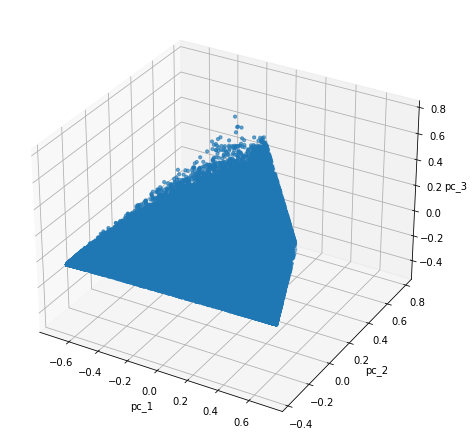

In [6]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
pca = decomposition.PCA(n_components=3)

pca_result = pca.fit_transform(df)

pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])


ax = Axes3D(plt.figure(figsize=(8, 6)))
ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], s=10)
ax.set_xlabel("pc_1")
ax.set_ylabel("pc_2")
ax.set_zlabel("pc_3")
plt.show()


<AxesSubplot:xlabel='Walking', ylabel='Count'>

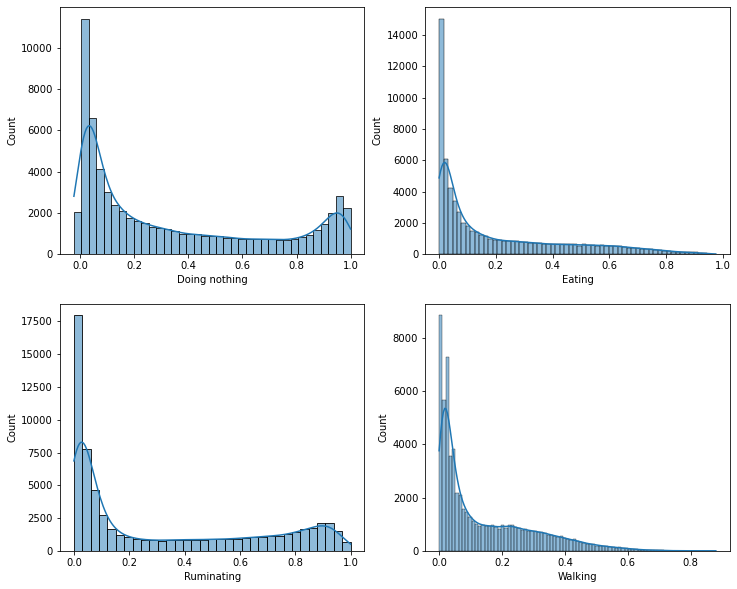

In [7]:
figure, axes = plt.subplots(2,2)
figure.set_size_inches(12, 10)

plt.subplot(2,2,1)
sns.histplot(df['Doing nothing'],kde=True)
plt.subplot(2,2,2)
sns.histplot(df['Eating'],kde=True)
plt.subplot(2,2,3)
sns.histplot(df['Ruminating'],kde=True)
plt.subplot(2,2,4)
sns.histplot(df['Walking'],kde=True)


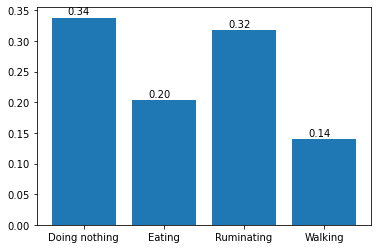

In [30]:
plot=plt.bar(x=list(df.columns),height=list(df.mean(axis=0)))
for j in plot:
    height=j.get_height()
    x=j.get_x()
    plt.text(x+0.2, height+0.005,'{:.2f}'.format (height),fontsize=10)

In [32]:
new_df=df.groupby(level=[0]).mean()
new_df

,Doing nothing,Eating,Ruminating,Walking
cow 1,0.279865,0.299827,0.316651,0.103657
cow 10,0.423648,0.106375,0.345699,0.124278
cow 11,0.388166,0.176033,0.341338,0.094463
cow 2,0.284282,0.245374,0.296345,0.173999
cow 3,0.339801,0.216676,0.320480,0.123043
cow 4,0.258990,0.265735,0.338547,0.136728
cow 5,0.302836,0.264159,0.291247,0.141758
cow 6,0.381098,0.162990,0.306754,0.149158
cow 7,0.355238,0.236682,0.305143,0.102937
cow 8,0.338547,0.114609,0.340281,0.206563


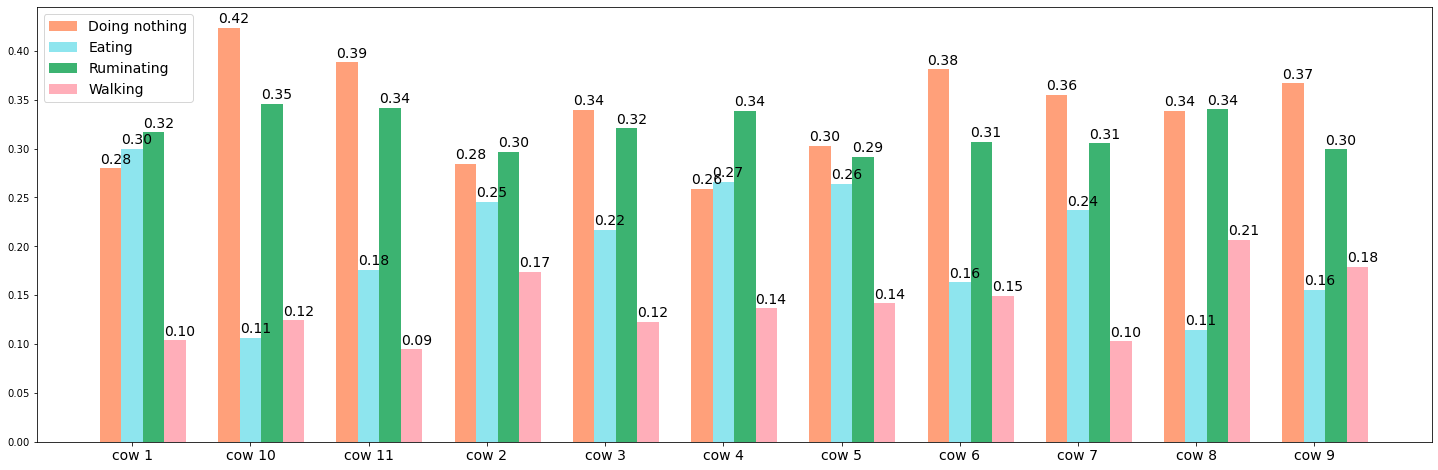

In [40]:
plt.figure(figsize=(25,8))
label=list(new_df.index)
x=np.linspace(0,len(label)*2,11)
barlist_1=plt.bar(x-0.4, new_df['Doing nothing'],width=0.4, label='Doing nothing', color='#FFA07A')
barlist_2=plt.bar(x, new_df['Eating'],width=0.4,label='Eating', color='#8EE5EE')
barlist_3=plt.bar(x+0.4, new_df['Ruminating'],width=0.4,label='Ruminating',color='#3CB371')
barlist_4=plt.bar(x+0.8, new_df['Walking'],width=0.4,label='Walking', color='#FFAEB9')
plt.xticks(x,label,fontsize=14) 
plt.legend(fontsize=14)
barlist=[barlist_1,barlist_2,barlist_3,barlist_4]
for i in barlist: 
    for j in i:
        height=j.get_height()
        x=j.get_x()
        plt.text(x, height+0.005,'{:.2f}'.format (height),fontsize=14)

<AxesSubplot:>

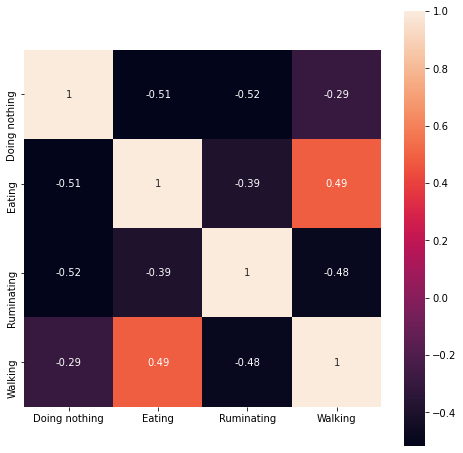

In [101]:
# correlation among data
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),square=True,annot=True)

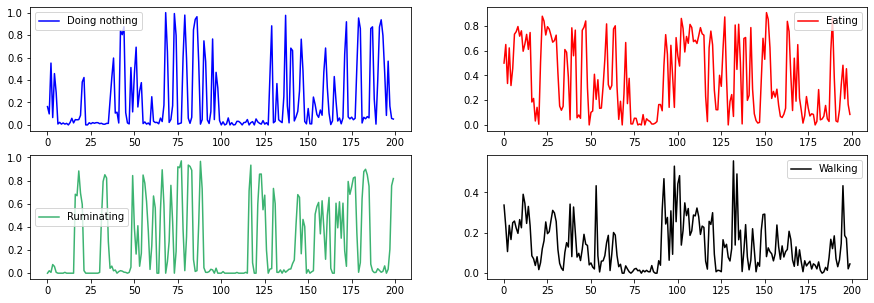

In [50]:
df_cow1=df.loc['cow 1']
fig , ax= plt.subplots(2,2,figsize=(15,5))

plt.subplot(2,2,1)
plt.plot(df_cow1['Doing nothing'][:200], label='Doing nothing', color='blue')
plt.legend()
plt.subplot(2,2,2)
plt.plot(df_cow1['Eating'][:200], label='Eating', color='red')
plt.legend()
plt.subplot(2,2,3)
plt.plot(df_cow1['Ruminating'][:200], label='Ruminating', color='mediumseagreen')
plt.legend()
plt.subplot(2,2,4)
plt.plot(df_cow1['Walking'][:200], label='Walking', color='black')
plt.legend()
